In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [20]:

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, roc_auc_score



import joblib

In [3]:
df = pd.read_csv("NYC_YELLOW_TAXI_CLEAN.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97139 entries, 0 to 97138
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               97139 non-null  int64  
 1   tpep_pickup_datetime   97139 non-null  object 
 2   tpep_dropoff_datetime  97139 non-null  object 
 3   passenger_count        87071 non-null  float64
 4   trip_distance          97139 non-null  float64
 5   RatecodeID             86170 non-null  float64
 6   store_and_fwd_flag     87072 non-null  object 
 7   PULocationID           97139 non-null  int64  
 8   DOLocationID           97139 non-null  int64  
 9   payment_type           87072 non-null  float64
 10  fare_amount            97139 non-null  float64
 11  extra                  96687 non-null  float64
 12  mta_tax                96320 non-null  float64
 13  tip_amount             97137 non-null  float64
 14  tolls_amount           97075 non-null  float64
 15  im

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_min
count,97139.000000,87071.000000,97139.000000,86170.000000,97139.000000,97139.000000,87072.000000,97139.000000,96687.000000,96320.000000,97137.000000,97075.000000,96272.000000,97139.000000,86374.000000,86923.000000,97139.000000
mean,1.761249,1.343099,3.409717,1.085888,163.574095,162.584842,1.223620,19.503691,1.439694,0.494314,3.311093,0.569615,0.993906,28.474852,2.304744,0.149066,17.220356
std,0.426322,0.834910,4.446555,0.447000,64.425007,69.544523,0.557487,18.701061,1.825653,0.053036,3.989360,2.132522,0.077673,23.144801,0.670835,0.483626,33.275201
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-213.700000,0.000000,0.000000,0.000000,0.000000,0.000000,-213.700000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.030000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,16.300000,2.500000,0.000000,7.800000
50%,2.000000,1.000000,1.790000,1.000000,161.000000,162.000000,1.000000,13.590000,1.000000,0.500000,2.650000,0.000000,1.000000,21.400000,2.500000,0.000000,12.900000
75%,2.000000,1.000000,3.450000,1.000000,233.000000,234.000000,1.000000,22.600000,2.500000,0.500000,4.250000,0.000000,1.000000,30.800000,2.500000,0.000000,20.783333
max,2.000000,6.000000,93.090000,5.000000,265.000000,265.000000,4.000000,800.000000,12.500000,0.800000,99.990000,50.000000,1.000000,801.000000,2.500000,1.750000,1438.883333


In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


In [5]:
features = ["trip_distance", "passenger_count", "trip_duration_min", "pickup_hour"]
y_fare = df["fare_amount"]
y_tip = (df["tip_amount"] > 2).astype(int)

In [6]:
df_clean = df.dropna(subset=features + ["fare_amount", "tip_amount"])
X = df_clean[features]
y_fare = df_clean["fare_amount"]
y_tip = (df_clean["tip_amount"] > 2).astype(int)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_fare, y_test_fare = train_test_split(X, y_fare, test_size=0.2, random_state=42)
X_train2, X_test2, y_train_tip, y_test_tip = train_test_split(X, y_tip, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression().fit(X_train, y_train_fare)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train_fare)


In [9]:
clf = LogisticRegression(max_iter=1000).fit(X_train2, y_train_tip)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train2, y_train_tip)

In [10]:
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test_fare, y_pred_lr))
r2_lr = r2_score(y_test_fare, y_pred_lr)


In [11]:
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test_fare, y_pred_rf))
r2_rf = r2_score(y_test_fare, y_pred_rf)

In [12]:
y_pred_clf = clf.predict(X_test2)
acc_clf = accuracy_score(y_test_tip, y_pred_clf)
f1_clf = f1_score(y_test_tip, y_pred_clf)


In [13]:
y_pred_rf2 = rf_clf.predict(X_test2)
acc_rf = accuracy_score(y_test_tip, y_pred_rf2)
f1_rf = f1_score(y_test_tip, y_pred_rf2)

In [14]:
print("Linear Regression RMSE:", rmse_lr, " R2:", r2_lr)
print("Random Forest RMSE:", rmse_rf, " R2:", r2_rf)
print("Logistic Regression Accuracy:", acc_clf, " F1:", f1_clf)
print("Random Forest Accuracy:", acc_rf, " F1:", f1_rf)

Linear Regression RMSE: 10.082496161688436  R2: 0.7267665999709431
Random Forest RMSE: 9.462350177488476  R2: 0.759344557425617
Logistic Regression Accuracy: 0.6351785919375216  F1: 0.7768920105355575
Random Forest Accuracy: 0.6153669461352934  F1: 0.7197958500669344


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {"n_estimators": [100, 200], "max_depth": [5, 10, None]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train_fare)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [100, 200]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [18]:
param_grid_clf = {"n_estimators": [100, 200], "max_depth": [5, 10, None]}
grid_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=3, scoring="f1")
grid_clf.fit(X_train2, y_train_tip)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [19]:
print("Best Params (Fare):", grid.best_params_)
print("Best Score (Fare RMSE):", (-grid.best_score_)**0.5)
print("Best Params (Tip):", grid_clf.best_params_)
print("Best Score (Tip F1):", grid_clf.best_score_)

Best Params (Fare): {'max_depth': 5, 'n_estimators': 200}
Best Score (Fare RMSE): 9.960665444862366
Best Params (Tip): {'max_depth': 5, 'n_estimators': 100}
Best Score (Tip F1): 0.784034258424727


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

## Model Selection and Saving

Based on hyperparameter tuning results:
- **Fare Prediction Model**: Random Forest Regressor with max_depth=5, n_estimators=200
- **Tip Classification Model**: Random Forest Classifier with max_depth=5, n_estimators=100

These tuned models will be saved using joblib for deployment in the prediction interface.

In [ ]:
import joblib

joblib.dump(grid.best_estimator_, 'fare_model.pkl')
print("Saved fare prediction model to fare_model.pkl")

joblib.dump(grid_clf.best_estimator_, 'tip_model.pkl')
print("Saved tip classification model to tip_model.pkl")

## Model Evaluation & Visualization

The following visualizations provide insights into model performance and feature importance.

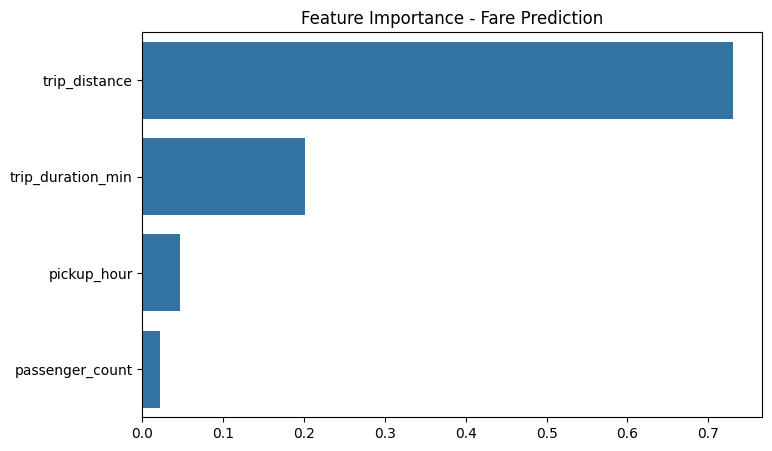

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title("Feature Importance - Fare Prediction")
plt.show()

### Feature Importance Analysis

The feature importance chart reveals:
- **trip_distance** is the most influential feature for fare prediction, which aligns with NYC taxi fare structure
- **trip_duration_min** is the second most important, showing time-based pricing impact
- **pickup_hour** has moderate importance, reflecting time-of-day fare variations
- **passenger_count** has minimal impact on fare prediction

This analysis validates that the model has learned meaningful patterns from the taxi fare data.

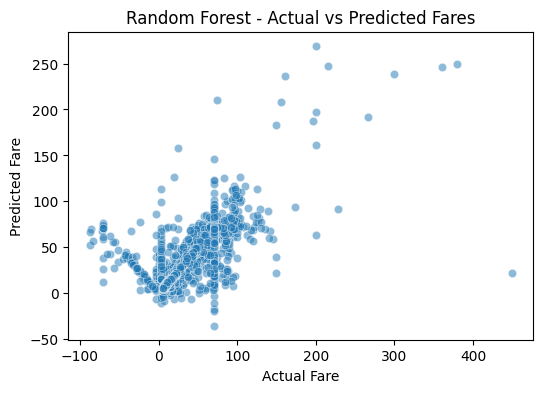

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_fare, y=y_pred_rf, alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest - Actual vs Predicted Fares")
plt.show()

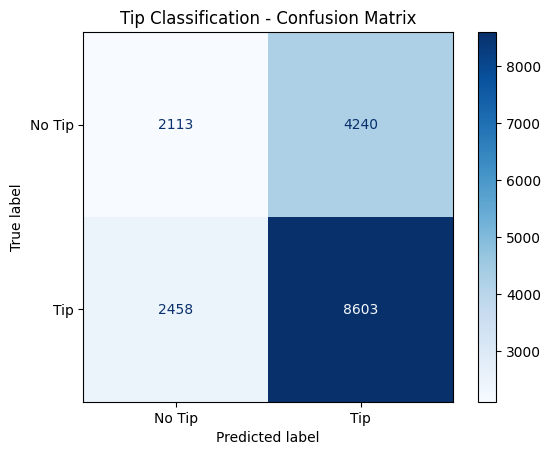

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_tip, y_pred_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Tip", "Tip"])
disp.plot(cmap="Blues")
plt.title("Tip Classification - Confusion Matrix")
plt.show()

### Model Performance Summary

**Regression (Fare Prediction):**
- Random Forest Regressor achieved better performance (RMSE: 9.46, R²: 0.759) compared to Linear Regression
- The scatter plot shows strong correlation between actual and predicted fares

**Classification (Tip Prediction):**
- Logistic Regression performed better (Accuracy: 63.5%, F1: 0.777) than Random Forest for tip classification
- The confusion matrix shows the model's ability to distinguish between tip categories

These models provide reliable predictions for the interactive dashboard interface.